Name : Silviana <br>
Class : DIT/FT/2A/14<br>
Student ID : P1939213<br>
Module : MS0204 - Mathematics for AI

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Load Data 

In [2]:
iris = pd.read_csv('./iris.csv')

iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Exploration 

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2 (a) Produce scatterplot for each pair of the variables

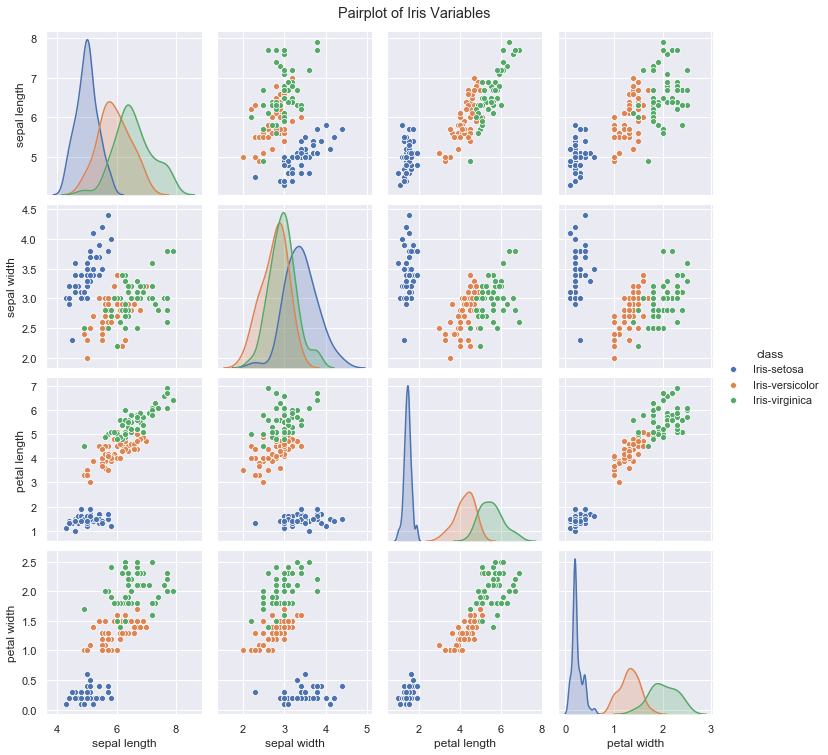

In [5]:
# fig = plt.subplots(figsize = (10, 10))
ax = sns.pairplot(iris, hue = 'class')
ax.fig.suptitle("Pairplot of Iris Variables", y = 1.03)

plt.savefig('iris_pairplot.png')
plt.show()

## Data Splitting

In [6]:
# select numeric and non numeric features
iris_num_features = iris.loc[:, iris.dtypes != 'object']
iris_non_num_features = iris.loc[:, iris.dtypes == 'object']
iris_num_columns = iris_num_features.columns

iris_num_features.shape

(150, 4)

# 2 (b) Should PCA be carried out on covariance or correlation matrix? Explain. 

For this dataset, PCA can be carried out on covariance matrix or correlation matrix because all of the features are of the same unit of measurement. 

# 2 (c) Extract the principal components. Justify your decision and interpret the principal components. You should include the necessary tables, outputs and graphs. 

## PCA of All Features 

In [7]:
## import pca
from sklearn.decomposition import PCA

pca = PCA(n_components = 4).fit(iris_num_features)

pca_samples = pca.transform(iris_num_features)

## PCA Results Table 

In [8]:
def pca_results(data, pca_):
    '''
    Generates important attributes of PCA result as dataframe
    
    Parameters
    --------------------
    
    data (dataframe): input data
    pca_: trained pca model
    --------------------
    
    Returns    
    --------------------
    dataframe
        columns: eigenvalues, 
                 explained variance,
                 cumulative explained variance,
                 eigenvectors for each data column
    --------------------
    '''
    
    dimensions = ['PC {}'.format(i) for i, component in enumerate(pca_.components_, start = 1)]

    # eigenvectors (components)
    components = pd.DataFrame(np.round(pca_.components_, 4), columns = data.keys())
    components.index = dimensions
    
    # eigenvalues
    evalues = pca_.explained_variance_.reshape(len(pca_.components_), 1)
    eigenvalues = pd.DataFrame(np.round(evalues, 4), columns  = ['Eigenvalue'])
    eigenvalues.index = dimensions
    
    # explained variance
    ratios = pca_.explained_variance_ratio_.reshape(len(pca_.components_), 1)
    explained_variance_ratio = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    explained_variance_ratio.index = dimensions
    
    # cumulative explained variance
    cum_ratios = pca_.explained_variance_ratio_.cumsum().reshape(len(pca_.components_), 1)
    cum_explained_variance_ratio = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_explained_variance_ratio.index = dimensions
    
    # construct final dataframe
    pca_result_df = pd.concat([eigenvalues, explained_variance_ratio, cum_explained_variance_ratio, components], axis = 1)
    
    return pca_result_df

In [9]:
iris_pca_results = pca_results(iris_num_features, pca)
iris_pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,sepal length,sepal width,petal length,petal width
PC 1,4.2248,0.9246,0.9246,0.3616,-0.0823,0.8566,0.3588
PC 2,0.2422,0.0530,0.9776,0.6565,0.7297,-0.1758,-0.0747
PC 3,0.0785,0.0172,0.9948,-0.5810,0.5964,0.0725,0.5491
PC 4,0.0237,0.0052,1.0000,0.3173,-0.3241,-0.4797,0.7511


#1 – Kaiser’s Rule (retain PCs with eigenvalues > 1)<br>
From Figure 2-2 above,  we can see that only PC1 has eigenvalues of above 1. Using this rule, we are going to consider keeping only PC1.<br>
#2 – Cumulative Explained Variance<br>
We are processing this data for descriptive purposes. Therefore, we can retain PCs whose cumulative explained variance is at least 70% to 80%. Considering this rule, we can keep PC1 as it accounts for 92.46% of the total variance.<br>


## Screeplot 

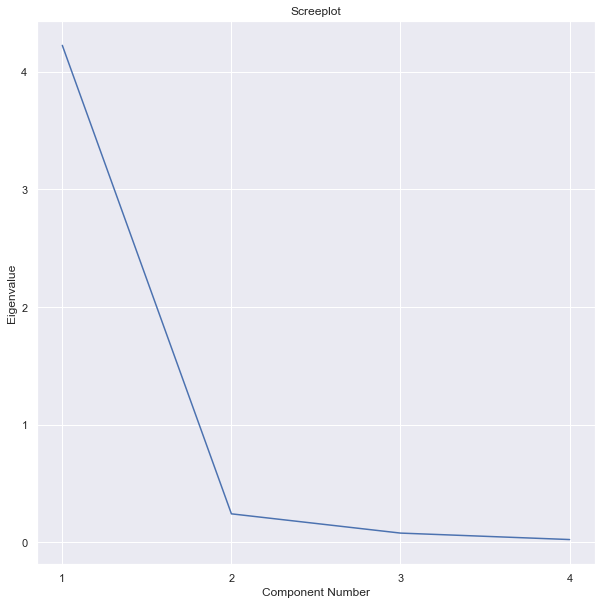

In [10]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (10, 10))

ax.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set(xlabel = 'Component Number', ylabel = 'Eigenvalue', title= 'Screeplot')
plt.savefig('iris_screeplot.png')
plt.show()

#3 – Screeplot
The inflection point is located at PC3. Therefore, based on this plot, we are to keep PC1 and PC2.

By looking at the combination of the 3 guidelines above, we are going to keep PC1. 


# Dimension Reduction 

In [11]:
pca2 = PCA(n_components=2).fit(iris_num_features)
pca_score = pd.DataFrame(pca2.transform(iris_num_features), columns = ['PC1', 'PC2'])

In [12]:
iris_pca2_results = pca_results(iris_num_features, pca2)
iris_pca2_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,sepal length,sepal width,petal length,petal width
PC 1,4.2248,0.9246,0.9246,0.3616,-0.0823,0.8566,0.3588
PC 2,0.2422,0.0530,0.9776,0.6565,0.7297,-0.1758,-0.0747


## Loading Plot

In [13]:
def loading_plot(data, pca_, width = 5, height = 5, margin = 0.5):
    '''
    Generates the loading plot
    
    Parameters
    --------------------
    data (dataframe) : input data
    pca_ : trained pca model
    width (numeric, optional) : figure width
    height (numeric, optional) : figure height
    margin (numeric, optional) : margin for xlim and ylim
    --------------------
    
    Returns    
    --------------------
    AxesSubplot
        Loading plot of all principal components
    --------------------
    '''
    fig, ax = plt.subplots(figsize = (width, height))
    
    # Set limits
    x_min = min(pca.components_[0, :].min(), 0) - margin
    x_max = max(pca.components_[0, :].max(), 0) + margin
    y_min = min(pca.components_[1, :].min(), 0) - margin
    y_max = max(pca.components_[1, :].max(), 0) + margin
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Scaling factor for text position
    x_offset = -0.045
    y_offset = 0.01

    
    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], 
                 head_width = 0.05, 
                 head_length = 0.1,
                 color = 'red')
        
        ax.text(v[0] + x_offset, v[1] + y_offset, 
                data.columns[i], 
                color='black', 
                ha='right', 
                va='center', 
                fontsize=14)

    
        
    plt.plot([x_min, x_max], [0, 0], color = 'k', linestyle='--', linewidth = 1)
    plt.plot([0, 0], [y_min, y_max], color = 'k', linestyle='--', linewidth = 1)
    ax.set_xlabel('PC1', fontsize = 14)
    ax.set_ylabel('PC2', fontsize = 14)
    ax.set_title('Loading Plot', fontsize = 14)
    
    return ax

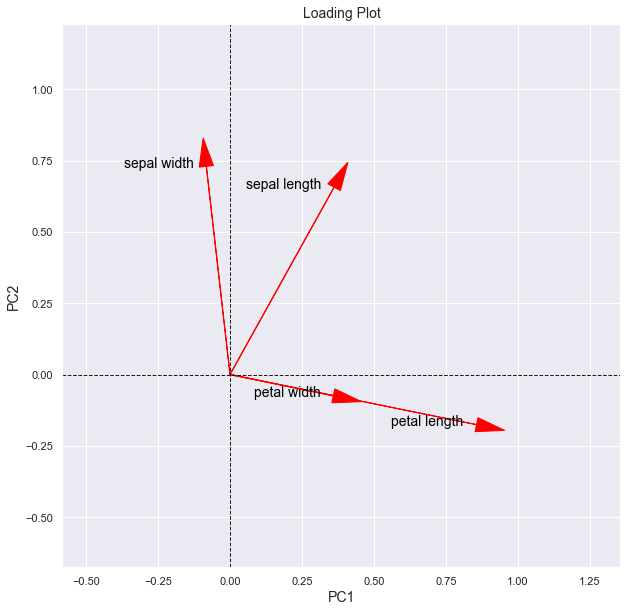

In [14]:
iris_lp = loading_plot(iris_num_features, pca2, width = 10, height = 10)
plt.savefig('iris_loadingplot.png')
plt.show()

PC1: $$y_1 ̂=0.362x_1-0.823x_2+0.857x_3+0.359x_4$$
For the first component, the loadings on sepal width and petal length are quite big. The direction of sepal width is opposite of the other measurements. This PC seems to tell us that bigger sepal length, petal width, petal length, and small sepal width would result in large positive $y_1 $ value. This PC seems to measure the contrast between the other species and setosa because Setosa has the setosa generally has smaller sepal length, petal width, and petal length compared to the other


# 2 (d) Comment on how the irises can be distinguished and identified after PCA.

## Score Plot

In [15]:
iris_full_data = pd.concat([iris_num_features, iris_non_num_features], axis = 1)

In [16]:
from sklearn.preprocessing import scale

#Convert dataframe to z-scores
data_centred = pd.DataFrame(scale(pca_score), columns=['PC1','PC2'])
data_centred.head()

,PC1,PC2
0,-1.310278,0.665813
1,-1.325500,-0.345654
2,-1.410646,-0.279989
3,-1.340655,-0.634250
4,-1.331944,0.680730


In [17]:
def scoreplot(data, scores, pca, width = 5, height = 5, margin = 0.5):
    fig, ax = plt.subplots(figsize = (width, height))
    ax = sns.scatterplot(x = 'PC1', y = 'PC2', data = scores, hue = data["class"])
    
    x_min = min(scores['PC1'].min(), 0) - margin
    x_max = max(scores['PC1'].max(), 0) + margin
    y_min = min(scores['PC2'].min(), 0) - margin
    y_max = max(scores['PC2'].max(), 0) + margin
    
    ax.set_xlim(x_min, x_max)
    ax.set_xlim(y_min, y_max)
    
    ax.set_title('Score Plot', fontsize = 14)
    
    plt.plot([x_min, x_max], [0, 0], color = 'k', linestyle = '--', linewidth = 1)
    plt.plot([0, 0], [y_min, y_max], color = 'k', linestyle = '--', linewidth = 1)
    
    return ax

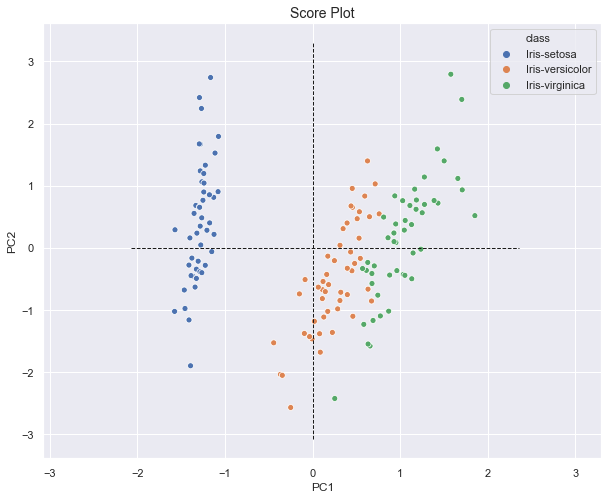

In [18]:
iris_scoreplot = scoreplot(iris_full_data, 
                           data_centred, 
                           pca2, 
                           width = 10,
                           height = 8)
plt.savefig('iris_scoreplot.png')
plt.show()

In [19]:
iris[iris['class'] == 'Iris-setosa']

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [20]:
iris.sample(5)

,sepal length,sepal width,petal length,petal width,class
103,6.3,2.9,5.6,1.8,Iris-virginica
110,6.5,3.2,5.1,2.0,Iris-virginica
80,5.5,2.4,3.8,1.1,Iris-versicolor
29,4.7,3.2,1.6,0.2,Iris-setosa
141,6.9,3.1,5.1,2.3,Iris-virginica


Iris-setosa can be identified by its small petal width, petal length, and sepal length, with big sepal width.<br>
Iris virginica generally has larger petal width, petal length, and sepal length than iris-versicolor although they both collide sometimes.<br>
Iris versicolor is generally everage because it’s located in the middle.
